# PCA - Principal Component Analysis

## 간단한 데이터 생성

In [2]:
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

rng = np.random.RandomState(13)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
x.shape

(200, 2)

In [3]:
rng.rand(2,2)

array([[0.60735693, 0.79695268],
       [0.81266616, 0.26598051]])

In [4]:
rng.randn(2, 200)

array([[-2.23305285e+00,  1.42026788e-01,  7.42047827e-01,
         1.11144113e+00,  4.49767208e-01, -1.43039670e+00,
         9.42539772e-01, -5.35146593e-01, -4.58967168e-01,
         1.15152877e+00, -1.97741771e+00,  2.23864876e+00,
         9.00084997e-01,  8.89032373e-01, -1.52296574e-01,
         7.04626895e-01,  6.12955068e-01,  2.39663182e-01,
        -1.51202147e+00,  4.44697716e-01,  2.53220525e-01,
         9.40787068e-01,  4.17302320e-01,  2.69558553e-01,
         1.68721062e-01, -1.48895017e+00, -1.85526666e+00,
        -1.10321722e-01, -7.04604762e-01,  4.55318527e-01,
        -1.22067190e+00, -5.65046518e-01,  7.06188812e-01,
         5.04389807e-03, -8.73259179e-01,  5.56018081e-01,
         2.67381976e-01, -1.03193483e+00, -6.35903189e-01,
         1.99779097e-01, -1.96516643e-01, -2.64890894e-01,
        -5.36168707e-01, -2.69395632e+00,  4.81339952e-01,
         3.08090862e-01, -1.37528268e-01, -1.80036570e+00,
        -4.19985810e-01, -2.85337341e-02, -2.31813179e-0

In [6]:
np.dot(rng.rand(2,2), rng.randn(2, 200)).T

array([[-2.28478921e-02,  9.98220980e-02],
       [ 6.26843943e-02,  5.08199149e-01],
       [-9.15775547e-03,  1.43004254e-01],
       [ 1.08357047e-01,  5.21287747e-01],
       [ 3.18639721e-01,  1.50584498e+00],
       [ 4.39035661e-02,  1.75800181e-01],
       [ 1.65759856e-01,  1.26413798e+00],
       [ 1.39512003e-01,  3.03500008e-01],
       [ 1.07364087e-01,  7.22648825e-01],
       [ 3.67954875e-03,  2.96429845e-01],
       [-2.85002894e-02, -1.66452547e-02],
       [-2.68609918e-01, -1.82158930e+00],
       [ 1.30235661e-01,  6.10931949e-01],
       [ 1.72393858e-01,  7.99085325e-01],
       [ 1.10895839e-01,  3.02927327e-01],
       [ 1.15299553e-01,  3.81756809e-01],
       [-2.61271142e-01, -1.29111825e+00],
       [ 1.74380941e-01,  9.56036747e-01],
       [-2.26236973e-01, -1.21757831e+00],
       [ 1.10519848e-01,  6.26545042e-01],
       [-6.08167844e-02, -5.68216213e-01],
       [ 1.27479968e-01,  1.12766246e+00],
       [-2.06363658e-01, -1.36233465e+00],
       [-5.

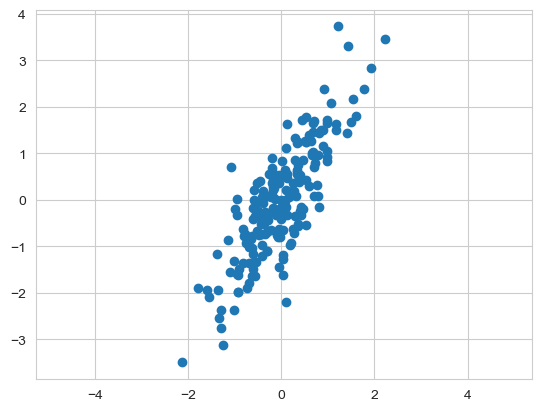

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal');  # x, y축 같은 간격으로 시각화

## PCA fit

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=13)
pca.fit(x)

PCA(n_components=2, random_state=13)

## 벡터와 분산값

In [9]:
pca.components_

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [10]:
pca.mean_

array([-0.03360413, -0.03527382])

In [11]:
pca.explained_variance_

array([1.82531406, 0.13209947])

In [12]:
pca.explained_variance_ratio_

array([0.93251326, 0.06748674])

## 주성분 벡터 시각화

In [ ]:
def draw_vector(v0, v1, ax=None) :
    ax = ax or plt.gca()    # ax값이 None이면 plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2, 
                      color='black',
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

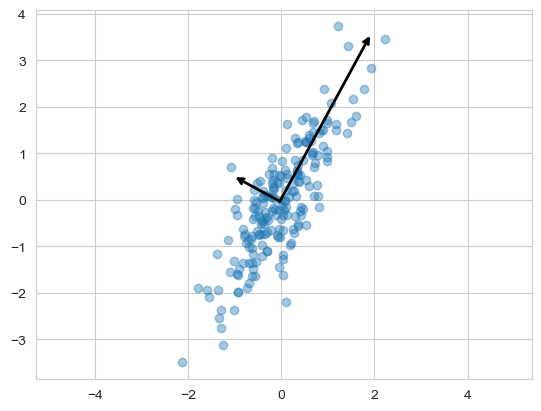

In [ ]:
plt.scatter(x[:,0], x[:,1], alpha=0.4)

# pca.explained_varaince_ : 벡터의 길이
# pca.components_ : 벡터
for length, vector in zip(pca.explained_variance_, pca.components_) :
    v = vector * 3 * np.sqrt(length)    # 시각화를 위해 크기x3
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

## 5. 주성분을 이용한 축 변경

### n_components=1

In [ ]:
pca = PCA(n_components=1, random_state=13)
pca.fit(x)

print(pca.components_)
print(pca.explained_variance_)

[[0.47802511 0.87834617]]
[1.82531406]


In [18]:
x_pca = pca.transform(x)

x.shape, x_pca.shape

((200, 2), (200, 1))

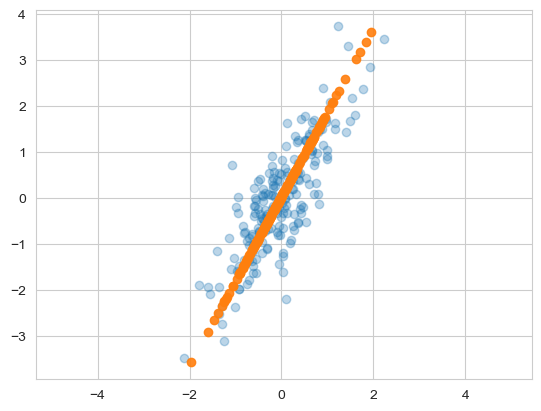

In [22]:
x_new = pca.inverse_transform(x_pca)

plt.scatter(x[:,0], x[:, 1], alpha=0.3)
plt.scatter(x_new[:,0], x_new[:,1], alpha=0.9)
plt.axis('equal')
plt.show()